<a href="https://colab.research.google.com/github/jisusP/Articulo/blob/main/Tanimoto_Morgan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install rdkit
!pip install seaborn
!pip install matplotlib.pyplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 10.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [11]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff

In [33]:
CM6 = Chem.MolFromSmiles("CCC1=CC=C2N=C(C=CC2=C1)C1=NC=CC=C1") 
CM7 = Chem.MolFromSmiles("ClC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1")
CM8 = Chem.MolFromSmiles("FC1=CC=C2N=C(C=CC2=C1)C1=CN=CC=C1")
CM9 = Chem.MolFromSmiles("C1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1")
CM10 = Chem.MolFromSmiles("CC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1 ")
CM11 = Chem.MolFromSmiles("ClC1=CC=C2N=C(C=CC2=C1)C1=CC=NC=C1")
CM12 = Chem.MolFromSmiles("ClC1=C2N=C(C=CC2=CC=C1)C1=CC=NC=C1 ")
CM13 = Chem.MolFromSmiles("FC1=CC=C2N=C(\C=C\C3=NC=CC=C3)C=CC2=C1")
CM14 = Chem.MolFromSmiles("C(=C/C1=NC2=CC=CC=C2C=C1)\C1=CN=CC=C1")
CM15 = Chem.MolFromSmiles("ClC1=CC=C2N=C(\C=C\C3=CN=CC=C3)C=CC2=C1 ")
CM16 = Chem.MolFromSmiles("C(=C/C1=NC2=CC=CC=C2C=C1)\C1=CC=NC=C1")
CM17 = Chem.MolFromSmiles("ClC1=CC=C2N=C(\C=C\C3=CC=NC=C3)C=CC2=C1 ")

In [4]:
fp6 = AllChem.GetMorganFingerprint(CM6, 2)
fp7 = AllChem.GetMorganFingerprint(CM7, 2)
fp8 = AllChem.GetMorganFingerprint(CM8, 2)
fp9 = AllChem.GetMorganFingerprint(CM9, 2)
fp10 = AllChem.GetMorganFingerprint(CM10, 2)
fp11 = AllChem.GetMorganFingerprint(CM11, 2)
fp12 = AllChem.GetMorganFingerprint(CM12, 2)
fp13 = AllChem.GetMorganFingerprint(CM13, 2)
fp14 = AllChem.GetMorganFingerprint(CM14, 2)
fp15 = AllChem.GetMorganFingerprint(CM15, 2)
fp16 = AllChem.GetMorganFingerprint(CM16, 2)
fp17 = AllChem.GetMorganFingerprint(CM17, 2)

In [5]:
DataStructs.TanimotoSimilarity(fp6, fp6)

1.0

In [6]:
fps = [fp6, fp7, fp8, fp9, fp10, fp11, fp12, fp13, fp14, fp15, fp16, fp17]

In [7]:
similarity_matrix = np.zeros((len(fps), len(fps)))
for i in range(len(fps)):
    for j in range(i+1, len(fps)):
        similarity = DataStructs.TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity 
print(similarity_matrix)

[[0.         0.49275362 0.49275362 0.46376812 0.49275362 0.47142857
  0.37333333 0.49315068 0.37179487 0.3974359  0.37179487 0.37974684]
 [0.49275362 0.         0.78571429 0.50769231 0.5625     0.72413793
  0.49253731 0.41333333 0.44444444 0.65625    0.36842105 0.53623188]
 [0.49275362 0.78571429 0.         0.50769231 0.5625     0.5625
  0.44927536 0.53623188 0.44444444 0.51428571 0.36842105 0.41333333]
 [0.46376812 0.50769231 0.50769231 0.         0.68965517 0.68965517
  0.66101695 0.38666667 0.52238806 0.36842105 0.64516129 0.44444444]
 [0.49275362 0.5625     0.5625     0.68965517 0.         0.78571429
  0.61290323 0.39473684 0.35064935 0.41333333 0.44444444 0.51428571]
 [0.47142857 0.72413793 0.5625     0.68965517 0.78571429 0.
  0.66666667 0.39473684 0.35064935 0.53623188 0.44444444 0.65625   ]
 [0.37333333 0.49253731 0.44927536 0.66101695 0.61290323 0.66666667
  0.         0.325      0.35064935 0.37662338 0.44444444 0.45205479]
 [0.49315068 0.41333333 0.53623188 0.38666667 0.39473

In [8]:
similitud_tanimoto = 1-(similarity_matrix)
print(similitud_tanimoto)

[[1.         0.50724638 0.50724638 0.53623188 0.50724638 0.52857143
  0.62666667 0.50684932 0.62820513 0.6025641  0.62820513 0.62025316]
 [0.50724638 1.         0.21428571 0.49230769 0.4375     0.27586207
  0.50746269 0.58666667 0.55555556 0.34375    0.63157895 0.46376812]
 [0.50724638 0.21428571 1.         0.49230769 0.4375     0.4375
  0.55072464 0.46376812 0.55555556 0.48571429 0.63157895 0.58666667]
 [0.53623188 0.49230769 0.49230769 1.         0.31034483 0.31034483
  0.33898305 0.61333333 0.47761194 0.63157895 0.35483871 0.55555556]
 [0.50724638 0.4375     0.4375     0.31034483 1.         0.21428571
  0.38709677 0.60526316 0.64935065 0.58666667 0.55555556 0.48571429]
 [0.52857143 0.27586207 0.4375     0.31034483 0.21428571 1.
  0.33333333 0.60526316 0.64935065 0.46376812 0.55555556 0.34375   ]
 [0.62666667 0.50746269 0.55072464 0.33898305 0.38709677 0.33333333
  1.         0.675      0.64935065 0.62337662 0.55555556 0.54794521]
 [0.50684932 0.58666667 0.46376812 0.61333333 0.60526

<Axes: >

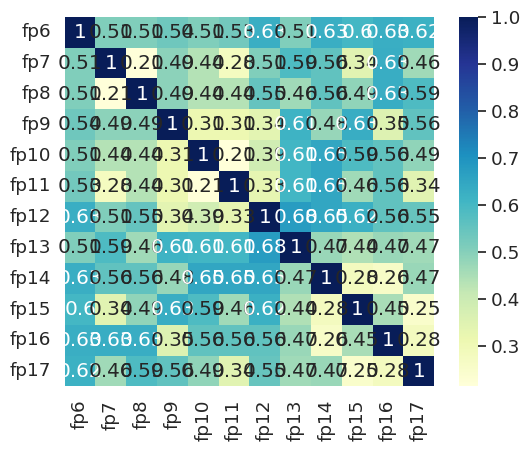

In [9]:
sns.set(font_scale=1.2)
sns.heatmap(similitud_tanimoto, cmap="YlGnBu", annot=True, square=True,
            xticklabels=["fp6", "fp7", "fp8", "fp9", "fp10", "fp11", "fp12", "fp13", "fp14", "fp15", "fp16", "fp17"],
            yticklabels=["fp6", "fp7", "fp8", "fp9", "fp10", "fp11", "fp12", "fp13", "fp14", "fp15", "fp16", "fp17"])

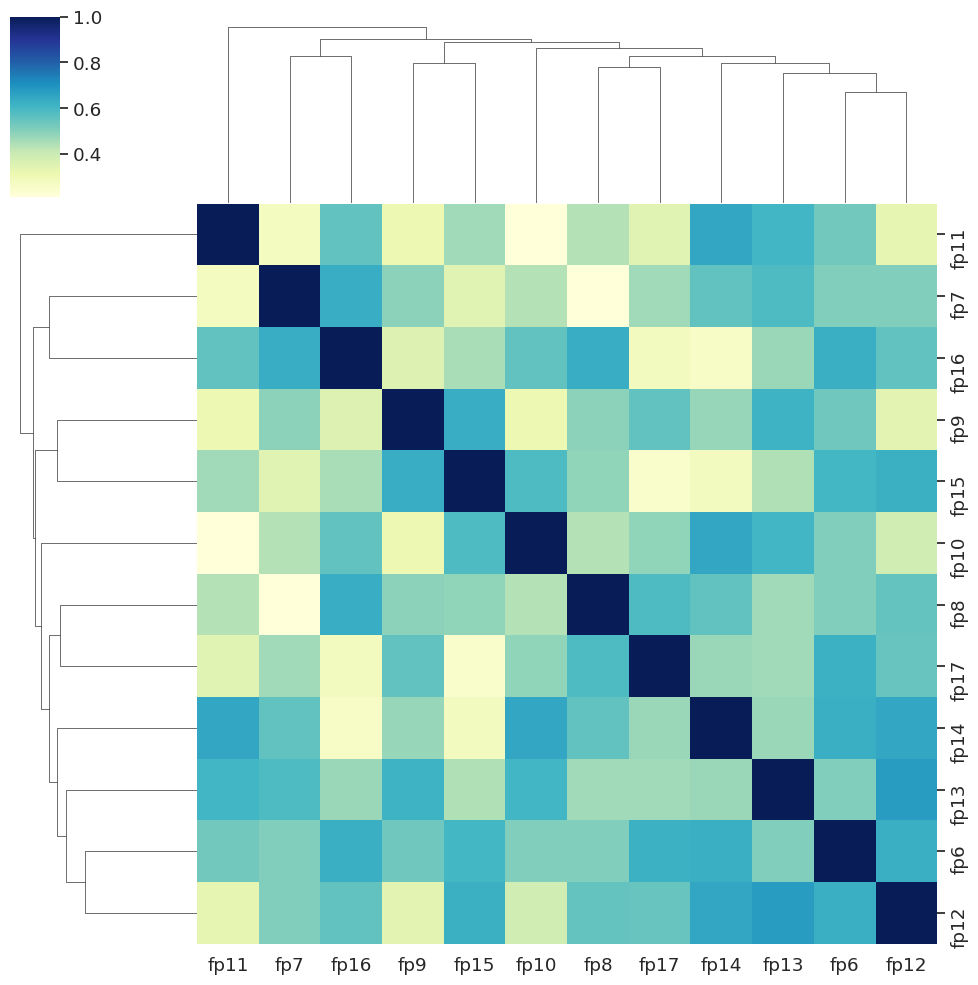

In [10]:
sns.set(font_scale=1.2)
g = sns.clustermap(similitud_tanimoto, cmap="YlGnBu", method='average',
                   row_cluster=True, col_cluster=True,
                   xticklabels=["fp6", "fp7", "fp8", "fp9", "fp10", "fp11", "fp12", "fp13", "fp14", "fp15", "fp16", "fp17"],
                   yticklabels=["fp6", "fp7", "fp8", "fp9", "fp10", "fp11", "fp12", "fp13", "fp14", "fp15", "fp16", "fp17"])

In [38]:
"Distancia"
lab = ["6","7","8","9","10","11","12","13","14","15","16","17"]
fig = ff.create_dendrogram(similarity_matrix, labels=lab)
fig.update_layout(width=800, height=500, title = "Dendrograma de la distancia (Tanimoto)", title_x=0.5)
fig.show()

In [ ]:
"Tanimoto"
fig = ff.create_dendrogram(similitud_tanimoto)
fig.update_layout(width=800, height=500,  title = "Dendrograma de Tanimoto", title_x=0.5)
fig.show()

<ipython-input-39-ff5217eb03fc>:5: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



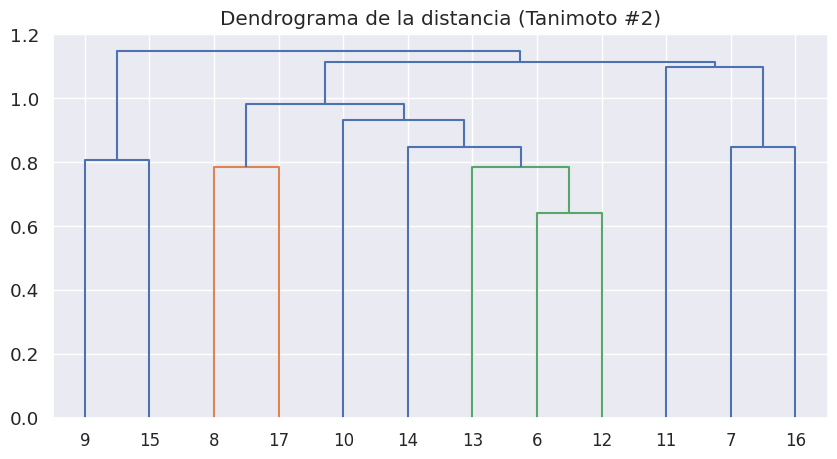

In [39]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.title("Dendrograma de la distancia (Tanimoto #2)")
d = shc.dendrogram(shc.linkage(similarity_matrix, method = "ward"), labels = lab)